## Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None) 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train=pd.read_csv(r"D:\DOCUMENTS\ML Notebooks\Credit Score Classification\train.csv")
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df_test=pd.read_csv(r"D:\DOCUMENTS\ML Notebooks\Credit Score Classification\test.csv")
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Data Info

In [5]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df_train.shape

(100000, 28)

In [7]:
df_test.shape

(50000, 27)

## Data Preprocessing Part 1

In [8]:
df_train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [9]:
df_train['Occupation'] = df_train['Occupation'].str.replace('_______', 'Other', regex=True)
df_train['Occupation'].unique()

array(['Scientist', 'Other', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Removing unwanted columns


In [10]:
cols_to_drop=[
    'ID','Customer_ID','Name','SSN'
]

In [11]:
df_train.drop(columns=cols_to_drop, inplace=True)
df_train.shape

(100000, 24)

In [13]:
df_train.select_dtypes(include='object').nunique()

Month                          8
Age                         1788
Occupation                    16
Annual_Income              18940
Num_of_Loan                  434
Type_of_Loan                6260
Num_of_Delayed_Payment       749
Changed_Credit_Limit        4384
Credit_Mix                     4
Outstanding_Debt           13178
Credit_History_Age           404
Payment_of_Min_Amount          3
Amount_invested_monthly    91049
Payment_Behaviour              7
Monthly_Balance            98792
Credit_Score                   3
dtype: int64

In [15]:
df_train.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

Drop categorical data that have 1 & 0 category and have a lot of category



In [16]:
df_train['Age']=df_train['Age'].str.replace(r'\D', '')
df_train['Annual_Income']=df_train['Annual_Income'].str.replace(r'\D', '')
df_train['Num_of_Loan']=df_train['Num_of_Loan'].str.replace(r'\D', '')
df_train['Num_of_Delayed_Payment']=df_train['Num_of_Delayed_Payment'].str.replace(r'\D', '')
df_train['Changed_Credit_Limit']=df_train['Changed_Credit_Limit'].str.replace(r'\D', '')
df_train['Outstanding_Debt']=df_train['Outstanding_Debt'].str.replace(r'\D', '')
df_train['Amount_invested_monthly']=df_train['Amount_invested_monthly'].str.replace(r'\D', '')
df_train['Monthly_Balance']=df_train['Monthly_Balance'].str.replace(r'\D', '')

In [17]:
df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,1911412,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,1127,4.0,_,80998,26.822620,22 Years and 1 Months,No,49.574949,8041529543900253,High_spent_Small_value_payments,31249408867943663,Good
1,February,23,Scientist,1911412,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,1127,4.0,Good,80998,31.944960,NaN,No,49.574949,11828022162236736,Low_spent_Large_value_payments,28462916249607184,Good
2,March,500,Scientist,1911412,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,,4.0,Good,80998,28.609352,22 Years and 3 Months,No,49.574949,81699521264648,Low_spent_Medium_value_payments,3312098628537912,Good
3,April,23,Scientist,1911412,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,627,4.0,Good,80998,31.377862,22 Years and 4 Months,No,49.574949,1994580743910713,Low_spent_Small_value_payments,22345130972736786,Good
4,May,23,Scientist,1911412,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,1127,4.0,Good,80998,24.797347,22 Years and 5 Months,No,49.574949,41420153086217326,High_spent_Medium_value_payments,34148923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,3962899,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,115,3.0,_,50238,34.663572,31 Years and 6 Months,No,35.104023,6097133255718485,High_spent_Large_value_payments,NaN,Poor
99996,May,25,Mechanic,3962899,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,115,3.0,_,50238,40.565631,31 Years and 7 Months,No,35.104023,5418595028760385,High_spent_Medium_value_payments,NaN,Poor
99997,June,25,Mechanic,3962899,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,115,3.0,Good,50238,41.255522,31 Years and 8 Months,No,35.104023,2402847744864441,High_spent_Large_value_payments,NaN,Poor
99998,July,25,Mechanic,3962899,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,115,3.0,Good,50238,33.638208,31 Years and 9 Months,No,35.104023,25167258219721603,Low_spent_Large_value_payments,NaN,Standard


In [18]:
# Drop specific columns
columns_to_drop = ['Type_of_Loan', 'Credit_History_Age', 'Monthly_Balance']
df_train = df_train.drop(columns_to_drop, axis=1)

In [19]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [21]:
#convert object data type column to integer
df_train['Age']=pd.to_numeric(df_train['Age'])
df_train['Annual_Income']=pd.to_numeric(df_train['Annual_Income'])
df_train['Num_of_Loan']=pd.to_numeric(df_train['Num_of_Loan'])
df_train['Num_of_Delayed_Payment']=pd.to_numeric(df_train['Num_of_Delayed_Payment'])
df_train['Changed_Credit_Limit']=pd.to_numeric(df_train['Changed_Credit_Limit'])
df_train['Outstanding_Debt']=pd.to_numeric(df_train['Outstanding_Debt'])
df_train['Amount_invested_monthly']=pd.to_numeric(df_train['Amount_invested_monthly'])

In [22]:
df_train.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Credit_Score                 object
dtype: object

In [23]:
df_train.shape

(100000, 21)

## EDA

In [24]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,January,23,Scientist,1911412,1824.843333,3,4,3,4,3,7.0,1127.0,4.0,_,80998,26.822620,No,49.574949,8.041530e+15,High_spent_Small_value_payments,Good
1,February,23,Scientist,1911412,NaN,3,4,3,4,-1,NaN,1127.0,4.0,Good,80998,31.944960,No,49.574949,1.182802e+16,Low_spent_Large_value_payments,Good
2,March,500,Scientist,1911412,NaN,3,4,3,4,3,7.0,NaN,4.0,Good,80998,28.609352,No,49.574949,8.169952e+13,Low_spent_Medium_value_payments,Good
3,April,23,Scientist,1911412,NaN,3,4,3,4,5,4.0,627.0,4.0,Good,80998,31.377862,No,49.574949,1.994581e+15,Low_spent_Small_value_payments,Good
4,May,23,Scientist,1911412,1824.843333,3,4,3,4,6,NaN,1127.0,4.0,Good,80998,24.797347,No,49.574949,4.142015e+16,High_spent_Medium_value_payments,Good


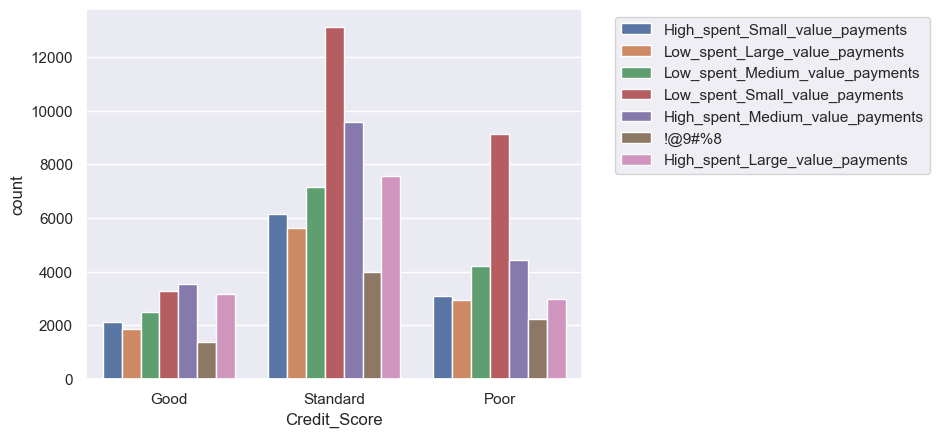

In [26]:
sns.countplot(data=df_train, x='Credit_Score', hue='Payment_Behaviour')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot:xlabel='Credit_Score', ylabel='Age'>

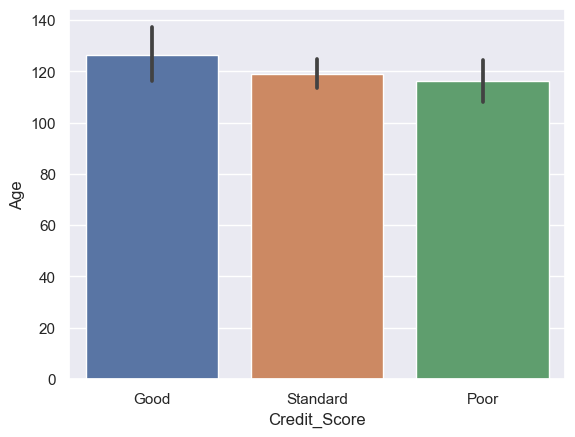

In [33]:
sns.barplot(data=df_train, x='Credit_Score',y='Age')

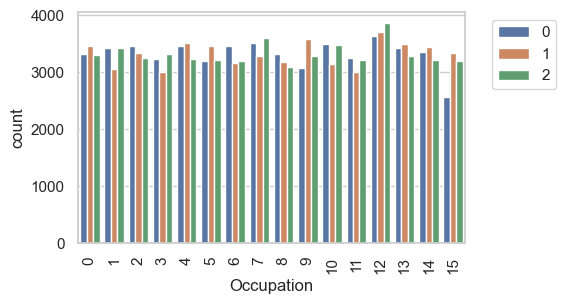

In [165]:
sns.countplot(data=df_train,x='Occupation',hue='Credit_Score')
plt.xticks(rotation='vertical')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

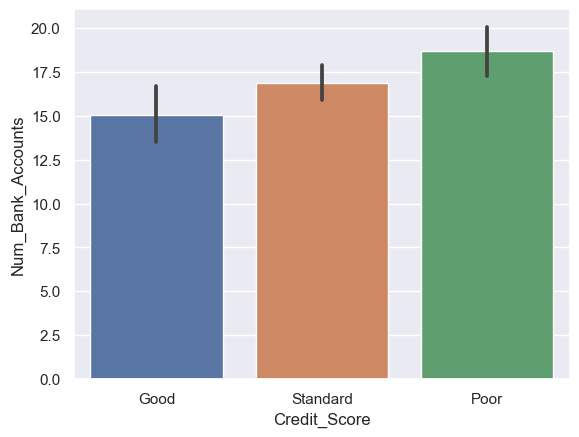

In [37]:
sns.barplot(data=df_train, x='Credit_Score',y='Num_Bank_Accounts')

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Credit_Card'>

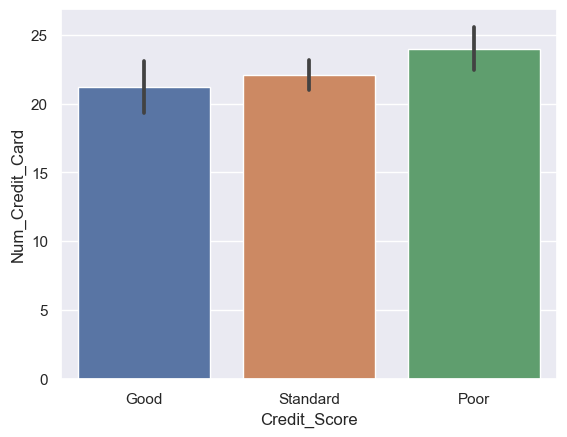

In [38]:
sns.barplot(data=df_train,x='Credit_Score',y='Num_Credit_Card')

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='count'>

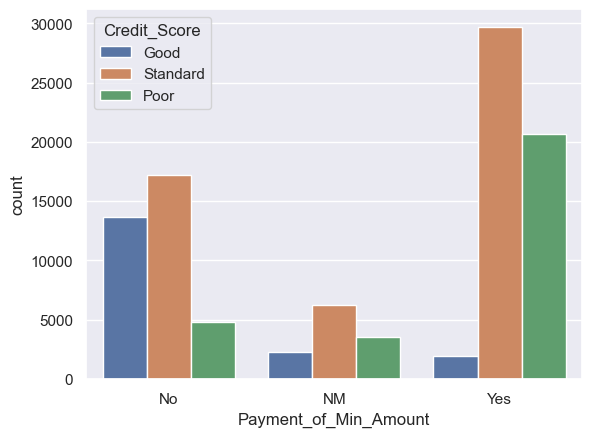

In [39]:
sns.countplot(data=df_train, x='Payment_of_Min_Amount',hue='Credit_Score')

<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

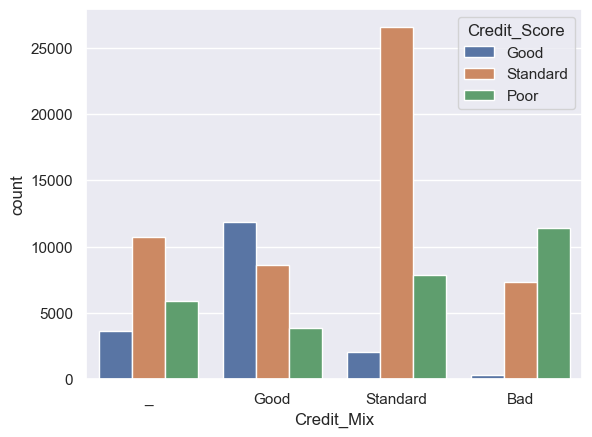

In [40]:
sns.countplot(data=df_train, x='Credit_Mix', hue='Credit_Score')

## Data Preprocessing Part 2

In [41]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,January,23,Scientist,1911412,1824.843333,3,4,3,4,3,7.0,1127.0,4.0,_,80998,26.822620,No,49.574949,8.041530e+15,High_spent_Small_value_payments,Good
1,February,23,Scientist,1911412,NaN,3,4,3,4,-1,NaN,1127.0,4.0,Good,80998,31.944960,No,49.574949,1.182802e+16,Low_spent_Large_value_payments,Good
2,March,500,Scientist,1911412,NaN,3,4,3,4,3,7.0,NaN,4.0,Good,80998,28.609352,No,49.574949,8.169952e+13,Low_spent_Medium_value_payments,Good
3,April,23,Scientist,1911412,NaN,3,4,3,4,5,4.0,627.0,4.0,Good,80998,31.377862,No,49.574949,1.994581e+15,Low_spent_Small_value_payments,Good
4,May,23,Scientist,1911412,1824.843333,3,4,3,4,6,NaN,1127.0,4.0,Good,80998,24.797347,No,49.574949,4.142015e+16,High_spent_Medium_value_payments,Good


In [42]:
df_train.drop(columns='Month', inplace=True)
df_train.shape

(100000, 20)

Label Encoding Categorical Variables

In [44]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns in the dataframe
object_cols = df_train.select_dtypes(include=['object']).columns

# Create a dictionary to store the label encoder for each column
label_encoders = {}

# Label encode object columns
for col in object_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

# Print the mapping between original values and encoded values
for col, le in label_encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Occupation: {'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Other': 12, 'Scientist': 13, 'Teacher': 14, 'Writer': 15}
Credit_Mix: {'Bad': 0, 'Good': 1, 'Standard': 2, '_': 3}
Payment_of_Min_Amount: {'NM': 0, 'No': 1, 'Yes': 2}
Payment_Behaviour: {'!@9#%8': 0, 'High_spent_Large_value_payments': 1, 'High_spent_Medium_value_payments': 2, 'High_spent_Small_value_payments': 3, 'Low_spent_Large_value_payments': 4, 'Low_spent_Medium_value_payments': 5, 'Low_spent_Small_value_payments': 6}
Credit_Score: {'Good': 0, 'Poor': 1, 'Standard': 2}


In [45]:
df_train.dtypes

Age                           int64
Occupation                    int32
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Credit_Score                  int32
dtype: object

In [53]:
#Check missing value percentage each contribute

check_missing=df_train.isnull().sum()*100/df_train.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Monthly_Inhand_Salary      15.002
Num_of_Delayed_Payment      7.002
Amount_invested_monthly     4.479
Changed_Credit_Limit        2.091
Num_Credit_Inquiries        1.965
dtype: float64

In [54]:
df_train.dtypes

Age                           int64
Occupation                    int32
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Credit_Score                  int32
dtype: object

Handling Null values

In [62]:
# List of columns with NaN values
columns_with_nan = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                    'Num_Credit_Inquiries', 'Amount_invested_monthly']

# Replace NaN values with the mean for each column
for col in columns_with_nan:
    mean_value = df_train[col].mean()
    df_train[col].fillna(mean_value, inplace=True)

In [63]:
df_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

Balancing our Target Class

In [65]:
df_train['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [74]:
from sklearn.utils import resample

# Separate data for each class
class_0 = df_train[df_train['Credit_Score'] == 0]
class_1 = df_train[df_train['Credit_Score'] == 1]
class_2 = df_train[df_train['Credit_Score'] == 2]

# Determine the size of the majority class
majority_size = max(len(class_0), len(class_1), len(class_2))

# Random oversample the minority classes
class_0_oversampled = resample(class_0, replace=True, n_samples=majority_size, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=majority_size, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=majority_size, random_state=42)

# Combine the balanced classes
df_balanced = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

# Check the class distribution in the balanced dataframe
print(df_balanced['Credit_Score'].value_counts())


0    53174
1    53174
2    53174
Name: Credit_Score, dtype: int64


In [76]:
df_train=df_balanced

In [79]:
df_train.shape

(159522, 20)

In [80]:
df_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

Removing Outliers

In [83]:
from scipy.stats import zscore

def remove_outliers(df_balanced):
    # Calculate z-scores for each column
    z_scores = df_train.apply(zscore)

    # Set a threshold for outlier detection (e.g., z-score > 3 or < -3)
    threshold = 3

    # Create a boolean mask to identify outliers
    outliers = (np.abs(z_scores) > threshold).any(axis=1)

    # Remove the outlier rows
    cleaned_data = df_train[~outliers]

    # Return the cleaned dataset
    return cleaned_data

# Example usage:
# Assuming you have a DataFrame named 'data' with columns you want to remove outliers from
cleaned_data = remove_outliers(df_train)

# Print the cleaned dataset
print(cleaned_data)


       Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
88766   28           8        3230373            4194.170850   
4637    30           1        2969558            2601.631667   
66884   29           5       11140452            9473.710000   
62989   53           3        6688274            5656.561667   
94683   37           1        9992517            8263.097500   
...    ...         ...            ...                    ...   
41116   35           1        2574412            1923.343333   
91022   38           0         585103            4967.858333   
82553   35          12        6500073            5588.727500   
75602   41          13        9559285             789.607083   
90700   19           1        3436132            2721.443333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
88766                  4                1              5            3   
4637                   8                3              3            0   
66884       

Correlation Heatmap

<AxesSubplot:>

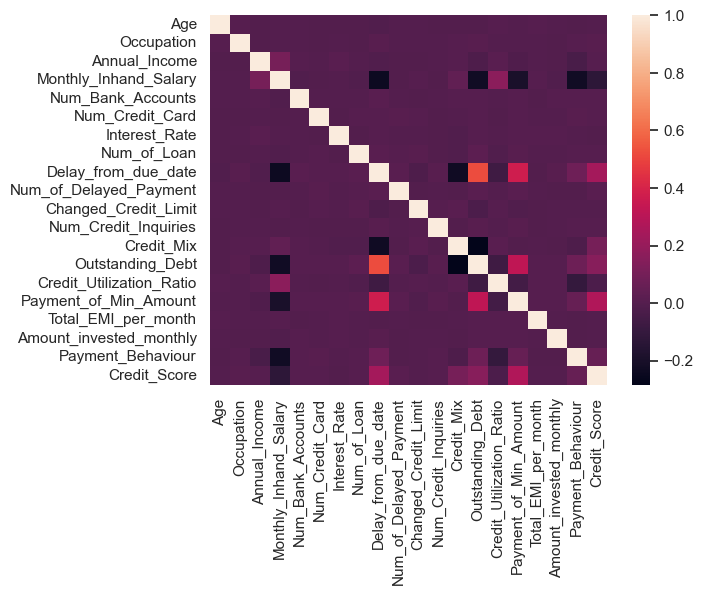

In [86]:
sns.heatmap(df_train.corr(), fmt='.2g')

                          Credit_Score_0  Credit_Score_1  Credit_Score_2
Age                               0.0053         -0.0068          0.0015
Occupation                       -0.0145          0.0114          0.0031
Annual_Income                     0.0030         -0.0134          0.0104
Monthly_Inhand_Salary             0.2065         -0.1884         -0.0181
Num_Bank_Accounts                -0.0092          0.0092          0.0000
Num_Credit_Card                  -0.0078          0.0074          0.0003
Interest_Rate                     0.0031          0.0010         -0.0041
Num_of_Loan                      -0.0089          0.0132         -0.0043
Delay_from_due_date              -0.4321          0.4504         -0.0183
Num_of_Delayed_Payment           -0.0175          0.0081          0.0095
Changed_Credit_Limit              0.0062         -0.0091          0.0029
Num_Credit_Inquiries             -0.0087          0.0089         -0.0002
Credit_Mix                       -0.0111         -0

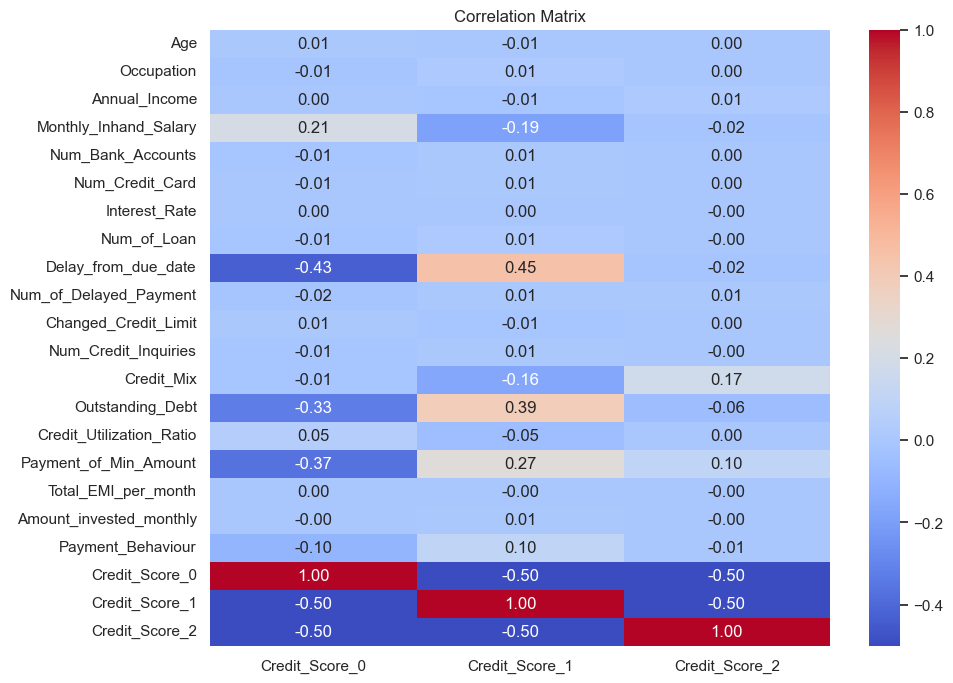

In [104]:
# Create a subset of the DataFrame for the target column and relevant features
subset = df_train[['Credit_Score', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour']]

# Convert 'Credit_Score' to categorical type if it's not already
subset['Credit_Score'] = subset['Credit_Score'].astype('category')

# Encode 'Credit_Score' as dummy variables (one-hot encoding)
encoded_subset = pd.get_dummies(subset)

# Compute the correlation matrix
correlation_matrix = encoded_subset.corr()

# Set display format for float values
pd.options.display.float_format = '{:.4f}'.format

# Extract the correlation with the target classes
correlation_with_classes = correlation_matrix[['Credit_Score_0', 'Credit_Score_1', 'Credit_Score_2']]

print(correlation_with_classes)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_with_classes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Model Building

In [106]:
df=df_train

Train Test Split

In [107]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [108]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

Importing Dependencies

In [128]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,cross_val_predict,KFold,cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score

Random Forest Classifier

In [136]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [146]:
y_pred = rfc.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='micro') * 100, 2)
precision = round(precision_score(y_test, y_pred, average='micro') * 100, 2)
recall = round(recall_score(y_test, y_pred, average='micro') * 100, 2)

print("Accuracy Score: {0:.2f}%".format(accuracy))
print("F-1 Score: {0:.2f}%".format(f1))
print("Precision Score: {0:.2f}%".format(precision))
print("Recall Score: {0:.2f}%".format(recall))


Accuracy Score: 93.88%
F-1 Score: 93.88%
Precision Score: 93.88%
Recall Score: 93.88%


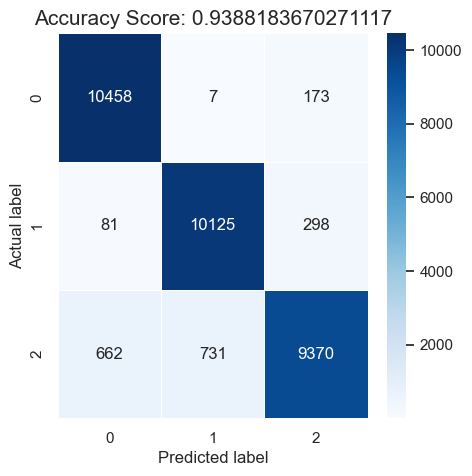

In [141]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)

plt.show()

In [142]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
13,Outstanding_Debt,0.1134
6,Interest_Rate,0.1065
8,Delay_from_due_date,0.0799
11,Num_Credit_Inquiries,0.0579
10,Changed_Credit_Limit,0.0551
12,Credit_Mix,0.0522
15,Payment_of_Min_Amount,0.0504
16,Total_EMI_per_month,0.0474
14,Credit_Utilization_Ratio,0.0471
2,Annual_Income,0.0470


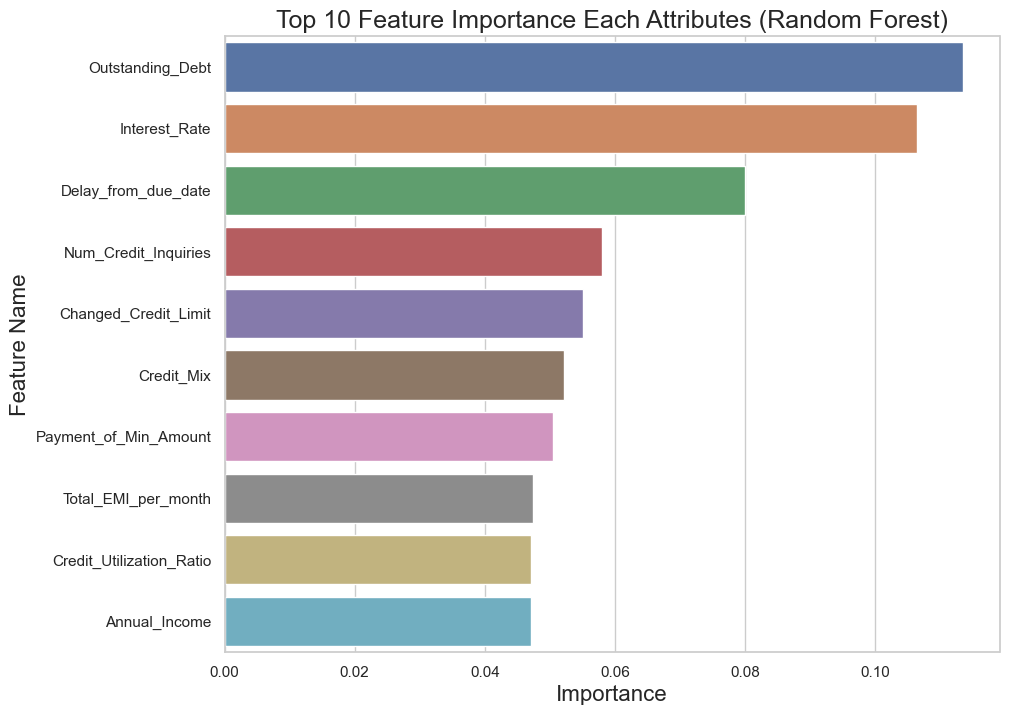

In [144]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

XGBoost Classifier

In [147]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [148]:
y_pred = xgb.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='micro') * 100, 2)
precision = round(precision_score(y_test, y_pred, average='micro') * 100, 2)
recall = round(recall_score(y_test, y_pred, average='micro') * 100, 2)

print("Accuracy Score: {0:.2f}%".format(accuracy))
print("F-1 Score: {0:.2f}%".format(f1))
print("Precision Score: {0:.2f}%".format(precision))
print("Recall Score: {0:.2f}%".format(recall))

Accuracy Score: 79.21%
F-1 Score: 79.21%
Precision Score: 79.21%
Recall Score: 79.21%


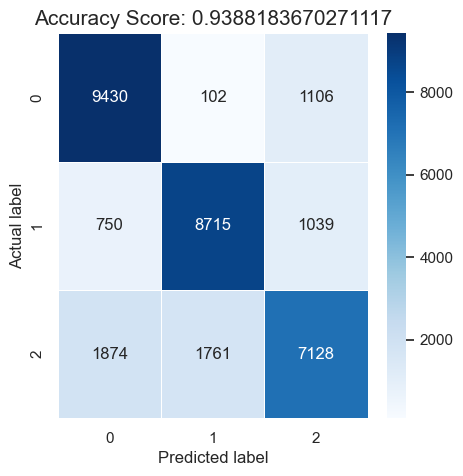

In [149]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)

plt.show()

In [150]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
15,Payment_of_Min_Amount,0.2763
12,Credit_Mix,0.2156
6,Interest_Rate,0.1498
13,Outstanding_Debt,0.0746
5,Num_Credit_Card,0.0363
8,Delay_from_due_date,0.0337
11,Num_Credit_Inquiries,0.0274
4,Num_Bank_Accounts,0.0247
16,Total_EMI_per_month,0.0216
10,Changed_Credit_Limit,0.0178


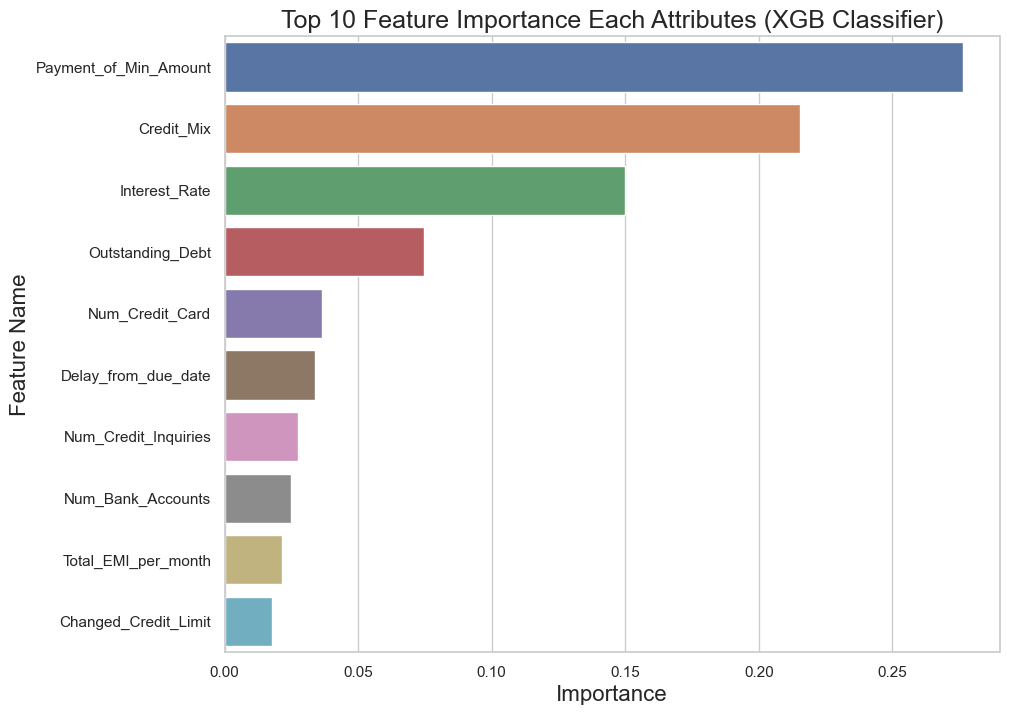

In [151]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (XGB Classifier)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Hyperparameter Tuning

In [160]:
from flaml import AutoML

automl = AutoML()

settings = {
    "time_budget": 1200,
    "task": 'classification',
    "estimator_list": ['rf'],
    "seed": 1,
}

automl.fit(X_train=X_train, y_train=y_train, **settings)


[flaml.automl.logger: 06-03 17:17:54] {1693} INFO - task = classification
[flaml.automl.logger: 06-03 17:17:54] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-03 17:17:54] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-03 17:17:54] {1801} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 06-03 17:17:54] {1911} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 06-03 17:17:54] {2221} INFO - iteration 0, current learner rf
[flaml.automl.logger: 06-03 17:17:54] {2347} INFO - Estimated sufficient time budget=12238s. Estimated necessary time budget=12s.
[flaml.automl.logger: 06-03 17:17:54] {2394} INFO -  at 1.5s,	estimator rf's best error=0.8471,	best estimator rf's best error=0.8471
[flaml.automl.logger: 06-03 17:17:54] {2221} INFO - iteration 1, current learner rf
[flaml.automl.logger: 06-03 17:17:54] {2394} INFO -  at 1.6s,	estimator rf's best error=0.8471,	best estimator rf's best error=0.8471
[flaml.automl.logge

In [161]:
rfc=RandomForestClassifier(criterion='entropy', max_features=0.2975357168342023,
                       max_leaf_nodes=32767, n_estimators=497, n_jobs=-1,
                       random_state=12032022)

In [163]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.2975357168342023,
                       max_leaf_nodes=32767, n_estimators=497, n_jobs=-1,
                       random_state=12032022)

In [164]:
y_pred = rfc.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='micro') * 100, 2)
precision = round(precision_score(y_test, y_pred, average='micro') * 100, 2)
recall = round(recall_score(y_test, y_pred, average='micro') * 100, 2)

print("Accuracy Score: {0:.2f}%".format(accuracy))
print("F-1 Score: {0:.2f}%".format(f1))
print("Precision Score: {0:.2f}%".format(precision))
print("Recall Score: {0:.2f}%".format(recall))

Accuracy Score: 93.97%
F-1 Score: 93.97%
Precision Score: 93.97%
Recall Score: 93.97%
